## Introduction to K-Means Clustering

K-Means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into distinct clusters. It is widely used in various fields, including data mining, image analysis, and pattern recognition.

### How K-Means Clustering Works
1. **Initialization**: The algorithm starts by randomly initializing cluster centroids.
   1. ##### Random Initialization:
      The initial centroids are chosen randomly from the data points in the dataset. Typically, K-Means selects K data points at random to serve as the initial centroids, where K is the number of desired clusters specified by the user. This random selection ensures that the algorithm explores a diverse set of starting points in the feature space.

   2. ##### Importance of Initial Centroids:
      The choice of initial centroids can significantly impact the final clustering outcome. Suboptimal initial centroids may lead to suboptimal clustering results, such as clusters being stuck in local minima or failing to capture the underlying structure of the data. Therefore, selecting appropriate initial centroids is crucial for the effectiveness of the K-Means algorithm.

   3. ##### Effects of Initialization:
      Since K-Means clustering is sensitive to the initial centroids, different random initializations may yield different clustering results. To mitigate this sensitivity, K-Means is often run multiple times with different random initializations, and the clustering result with the lowest objective function (e.g., total within-cluster variance) is selected as the final output.

   4. ##### Advanced Initialization Techniques:
      In addition to random initialization, various advanced techniques have been proposed to improve the selection of initial centroids. These techniques include k-means++ initialization, which intelligently selects initial centroids based on their distances from each other, ensuring a more balanced spread of centroids across the feature space. Other techniques involve using the results of hierarchical clustering or other clustering algorithms as initial centroids.

2. **Assignment**: It assigns each data point to the nearest cluster centroid based on a distance metric (usually Euclidean distance).
   1. ##### Nearest Centroid Assignment:
   For each data point in the dataset, K-Means calculates its distance to each of the cluster centroids. The data point is then assigned to the cluster with the nearest centroid, i.e., the cluster whose centroid is closest to the data point in terms of Euclidean distance.

   2. ##### Distance Metric:
   Euclidean distance is commonly used as the distance metric in K-Means clustering due to its simplicity and effectiveness. However, other distance metrics such as Manhattan distance or cosine similarity can also be used depending on the nature of the data and the problem at hand.

   3. ##### Minimization of Within-Cluster Variance:
   The goal of the assignment step is to minimize the within-cluster variance, i.e., the sum of squared distances between each data point and its assigned centroid within the cluster. By assigning each data point to the nearest centroid, K-Means aims to create compact and well-separated clusters.

   4. ##### Computational Efficiency:
   While the assignment step involves calculating distances between data points and centroids, K-Means is computationally efficient due to its linear time complexity with respect to the number of data points and clusters.

   5. ##### Iterative Process:
   The assignment step is part of the iterative optimization process of K-Means clustering. After assigning all data points to clusters, the algorithm proceeds to the next step, where it updates the centroids based on the newly assigned data points. This iterative process continues until convergence, where the assignments and centroids no longer change significantly between iterations.

3. **Update Centroids**: After all data points are assigned, the algorithm updates the cluster centroids by computing the mean of all data points assigned to each cluster.
   1. ##### Computing Centroid Mean:
   For each cluster, the algorithm calculates a new centroid position by taking the mean of the feature values of all data points assigned to that cluster. This mean represents the central point of the cluster in the feature space.

   2. ##### Minimization of Within-Cluster Variance:
   The Update Centroids step aims to minimize the within-cluster variance by adjusting the centroids to better represent the data points within each cluster. By computing the mean of the assigned data points, K-Means ensures that the centroids move towards the center of their respective clusters.

   3. ##### Iterative Optimization:
   Updating the centroids is part of the iterative optimization process of K-Means clustering. After updating the centroids, the algorithm repeats the Assignment step to reassign data points based on the new centroid positions. This iterative process continues until convergence, where the assignments and centroids stabilize and no longer change significantly between iterations.

   4. ##### Convergence Criteria:
   Convergence is reached when the centroids no longer change significantly between consecutive iterations or when a specified number of iterations is reached. At this point, the K-Means algorithm terminates, and the final clustering result is obtained.

   5. ##### Computational Efficiency:
   Although updating centroids involves computing means for each cluster, K-Means remains computationally efficient due to its linear time complexity. The computational cost of updating centroids scales linearly with the number of data points and clusters.

4. **Iteration**: Steps 2 and 3 are repeated iteratively until convergence, i.e., until the centroids no longer change significantly or a predefined number of iterations is reached.

### Key Concepts
- **Clusters**: Groups of data points that are similar to each other and dissimilar to data points in other clusters.
- **Centroids**: Representative points within each cluster, computed as the mean of all data points in the cluster.
- **Distance Metric**: A measure of dissimilarity between data points, commonly Euclidean distance.
- **Initialization**: K-Means is sensitive to initial centroid positions, and different initializations may lead to different clustering results.

### Applications of K-Means Clustering
- **Customer Segmentation**: Grouping customers based on similar behavior or characteristics.
- **Image Compression**: Grouping similar pixels together to reduce the size of an image.
- **Anomaly Detection**: Identifying unusual patterns or outliers in data.

K-Means clustering is a versatile algorithm with various applications and can be applied to datasets of different sizes and dimensions to discover meaningful patterns and insights.






<iframe src="https://www.naftaliharris.com/blog/visualizing-k-means-clustering/" width="1600" height="700"></iframe>

## Importing Required Libraries

In [ ]:
!pip install numpy matplotlib plotly scikit-learn scipy

In [236]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn import datasets
from scipy.optimize import linear_sum_assignment

## Explanation: Mapping Cluster Labels to True Labels

The provided function `map_cluster_labels_to_true_labels` is used to map cluster labels obtained from K-Means clustering to the true labels, typically used in supervised learning scenarios. Below is an explanation of each step within the function:

1. **Calculate Confusion Matrix**:
   - `confusion_mat = confusion_matrix(true_labels, cluster_labels)`: This line computes the confusion matrix between the true labels and the cluster labels.

2. **Optimal Label Assignment**:
   - `row_inds, col_inds = linear_sum_assignment(confusion_mat, maximize=True)`: Using the Hungarian algorithm, this line finds the optimal assignment of true labels to cluster labels.

3. **Create Label Map**:
   - `label_map = dict(zip(col_inds, row_inds))`: This line creates a mapping between the cluster labels and the true labels based on the optimal assignment.

4. **Remap Cluster Labels**:
   - `remapped_y_pred = np.vectorize(label_map.get)(cluster_labels)`: Using the label map, this line remaps the cluster labels to the corresponding true labels.

5. **Sort Confusion Matrix**:
   - The next few lines sort the confusion matrix based on the optimal label assignment to enhance visualization.

6. **Compute Maximum Value per Row**:
   - `tmp = remapped_conf_matrix.max(axis=1)`: This line computes the maximum value per row in the remapped confusion matrix.

7. **Update Maximum Values**:
   - The subsequent loop updates the maximum values to obtain the indices corresponding to the correct class for each row.

Finally, the function returns the remapped cluster labels, the sorted confusion matrix, and the indices representing the correct class for each row.

The code block also includes loading the Iris dataset, splitting it into training and testing sets, and defining color and name mappings for visualization purposes.

In [237]:
def map_cluster_labels_to_true_labels(cluster_labels, true_labels):
    confusion_mat = confusion_matrix(true_labels, cluster_labels)
    row_inds, col_inds = linear_sum_assignment(confusion_mat, maximize=True)
    label_map = dict(zip(col_inds, row_inds))
    remapped_y_pred = np.vectorize(label_map.get)(cluster_labels)
    remapped_conf_matrix = np.array([[row[label_map[i]] for i in range(len(row))] for row in confusion_mat])

    transposed_matrix = remapped_conf_matrix.transpose()
    sorted_columns = [sorted(column) for column in transposed_matrix]
    sorted_matrix = list(map(list, zip(*sorted_columns)))

    tmp = remapped_conf_matrix.max(axis=1)

    for idx, row in enumerate(remapped_conf_matrix):
        tmp[idx] = np.where(row == tmp[idx])[0][0]

    return remapped_y_pred, np.array(sorted_matrix), tmp

iris = datasets.load_iris()
x = iris.data
y = iris.target

iris_colormap = np.array(['red', 'blue', 'green'])
iris_namemap = np.array(iris.target_names)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.45, random_state=42)


## Visualizing Actual vs. Predicted Data in 3D

The provided code block visualizes the actual data and the predicted data using a 3D scatter plot, comparing their distributions in the feature space.

### Actual Data
- The left subplot (`subplot(1, 2, 1)`) represents the actual data.
- It visualizes the data points in a 3D space with features: Petal width, Sepal length, and Petal length.
- Each data point is colored according to its true label using the colormap specified for the Iris dataset.

### Prediction Data
- The right subplot (`subplot(1, 2, 2)`) represents the predicted data.
- It utilizes K-Means clustering to predict the labels of the test data.
- The predicted labels are mapped to their true labels for comparison using the function `map_cluster_labels_to_true_labels`.
- The data points are then visualized in a 3D space, colored according to the mapped labels.

### Explanation
- The code uses Matplotlib to create a figure with two subplots, each representing the actual and predicted data, respectively.
- For each subplot, a 3D scatter plot is created using the `scatter` function, plotting the data points based on their feature values.
- Axes labels and titles are set for clarity.
- The color of each data point represents its class label, allowing for easy visualization and comparison between the actual and predicted data distributions.

This visualization aids in assessing the performance of the K-Means clustering algorithm by comparing the clustering results with the ground truth labels.

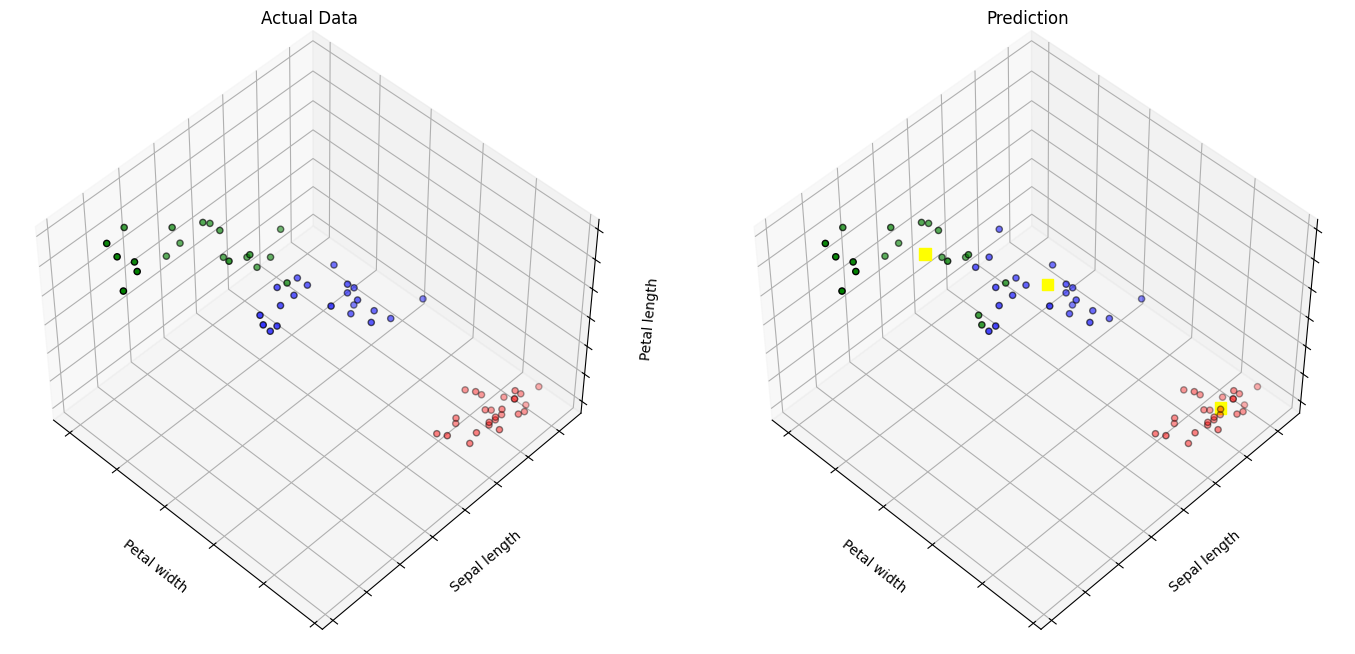

In [238]:
fig = plt.figure(figsize=(17, 10))

#! Actual data
ax = fig.add_subplot(1, 2, 1, projection="3d", elev=48, azim=134)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Actual Data")
ax.scatter(x_test[:, 3], x_test[:, 0], x_test[:, 2], c=iris_colormap[y_test], edgecolor="k")

#! Prediction data
ax = fig.add_subplot(1, 2, 2, projection="3d", elev=48, azim=134)
model = KMeans(n_clusters=3, algorithm="lloyd", max_iter=300)
model.fit(x_train)
y_predicted = model.predict(x_test)


mapped_labels, c_matrix_, _ = map_cluster_labels_to_true_labels(y_predicted, y_test)

centroids = model.cluster_centers_
ax.scatter(centroids[:, 3], centroids[:, 0], centroids[:, 2], c="yellow", marker="s", s=70, alpha=1)
ax.scatter(x_test[:, 3], x_test[:, 0], x_test[:, 2], c=iris_colormap[mapped_labels], edgecolor="k")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Prediction");

## Evaluating Clustering Accuracy and Displaying Confusion Matrix

The provided code block calculates the clustering accuracy and displays the confusion matrix based on the mapped cluster labels.

### Clustering Accuracy
- The accuracy of the clustering algorithm is calculated by comparing the mapped cluster labels to the true labels.
- The accuracy is computed as the ratio of correctly clustered data points to the total number of data points in the test set.
- The accuracy is then printed to the console using f-strings.

### Confusion Matrix Display
- The confusion matrix provides a comprehensive visualization of the clustering performance.
- It displays the counts of true positive, true negative, false positive, and false negative predictions for each class.
- The confusion matrix is displayed using the `ConfusionMatrixDisplay` class from scikit-learn.
- The display labels for the confusion matrix are specified as the target names of the Iris dataset.
- The confusion matrix plot is rendered using Matplotlib.

This code block enables a quick assessment of the clustering accuracy and provides an intuitive visualization of the clustering performance through the confusion matrix.

Accuracy: 0.8823529411764706


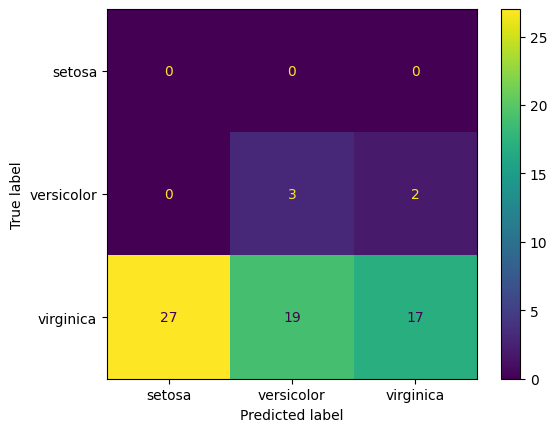

In [239]:
print(f"Accuracy: {sum(mapped_labels) / len(y_test)}")
conf_fig = ConfusionMatrixDisplay(c_matrix_, display_labels=iris_namemap).plot();

<iframe src="https://setosa.io/ev/principal-component-analysis/" width="1600" height="700"></iframe>

## Data Preparation and Dimensionality Reduction

The provided code block performs data preparation, including loading the digits dataset and applying PCA (Principal Component Analysis) for dimensionality reduction.

### Loading Digits Dataset
- The `digits` dataset is loaded using scikit-learn's `datasets.load_digits()` function.
- This dataset contains handwritten digit images, where each image is represented as a feature vector.

### PCA Dimensionality Reduction
- PCA (Principal Component Analysis) is applied to reduce the dimensionality of the feature matrix.
- The `PCA` class from scikit-learn is used to perform PCA with three principal components (`n_components=3`).
- The original feature matrix (`x`) is transformed into a lower-dimensional space (`x_pca`) while retaining the most significant variance.

### Data Splitting
- The feature matrix (`x`) and its PCA-transformed counterpart (`x_pca`) are split into training and testing sets using `train_test_split`.
- This step divides the data into training and testing subsets to assess the model's performance.

This code block prepares the digits dataset for further analysis, reducing its dimensionality using PCA and splitting it into training and testing sets for model evaluation.


In [240]:
colors = np.array([plt.get_cmap('viridis')(i * 1 / 9) for i in range(10)])

digits = datasets.load_digits()
pca = PCA(n_components=3)

x = digits.data  # Feature matrix
y = digits.target  # Target variable
x_pca = pca.fit_transform(x)
x_train, x_test, x_pca_train, x_pca_test, y_train, y_test = train_test_split(x, x_pca, y, test_size=.33, random_state=122)

## Visualizing K-Means Clustering on Digits Dataset

The provided code block visualizes the results of K-Means clustering applied to the digits dataset in a 3D scatter plot.

### K-Means Clustering
- K-Means clustering is performed on the training data with 10 clusters (`n_clusters=10`) using the `KMeans` class from scikit-learn.
- The model is trained on the reduced-dimensional feature matrix (`x_train`) obtained through PCA.

### Visualization
- The 3D scatter plot is created using Plotly's `Scatter3d` object.
- Each data point in the scatter plot represents a digit image transformed into a lower-dimensional space by PCA.
- Data points are colored according to the predicted cluster labels obtained from K-Means clustering.
- The color mapping is defined based on the predicted cluster labels and the predefined colors.

### Plot Layout
- The layout of the plot is specified using Plotly's `Layout` object.
- The title of the plot and axis labels for the three principal components (PC1, PC2, and PC3) are defined in the layout.

This visualization provides insight into how the digits are clustered in the reduced-dimensional space by K-Means clustering, facilitating the exploration of patterns and clusters within the dataset.


In [241]:
model = KMeans(n_clusters=10)
model.fit(x_pca_train)

y_predicted = model.predict(x_pca_test)

centroids = model.cluster_centers_

scatter = go.Scatter3d(
    x=x_pca_test[:, 0],
    y=x_pca_test[:, 1],
    z=x_pca_test[:, 2],
    mode='markers',
    marker=dict(
        size=4,
        color=colors[y_predicted],
        opacity=0.8
    ),
    name='data'
)

centroid_scatter = go.Scatter3d(
    x=centroids[:, 0],
    y=centroids[:, 1],
    z=centroids[:, 2],
    mode='markers',
    marker=dict(
        size=9,
        color='red',
        opacity=1,
        symbol="diamond"
    ),
    name='Centroid'
)

layout = go.Layout(
    title='K-Means Clustering on Digits Dataset',
    scene=dict(
        xaxis=dict(title='PC 1'),
        yaxis=dict(title='PC 2'),
        zaxis=dict(title='PC 3')
    )
)

fig = go.Figure(data=[scatter, centroid_scatter], layout=layout)
fig.show()

## Evaluating Clustering Accuracy and Displaying Confusion Matrix

The provided code block evaluates the clustering accuracy and displays the confusion matrix based on the mapped cluster labels compared to the true labels.

### Clustering Accuracy
- The function `map_cluster_labels_to_true_labels` is used to map the cluster labels obtained from K-Means clustering to the true labels.
- The accuracy of clustering is calculated by comparing the mapped cluster labels to the true labels.
- The `accuracy_score` function from scikit-learn is used to compute the accuracy, which measures the proportion of correctly clustered samples.
- The accuracy score is printed to the console using f-strings.

### Confusion Matrix Display
- The confusion matrix provides a detailed visualization of the clustering performance.
- It displays the counts of true positive, true negative, false positive, and false negative predictions for each class.
- The confusion matrix is displayed using the `ConfusionMatrixDisplay` class from scikit-learn.
- The display labels for the confusion matrix are specified as the sorted labels obtained from mapping cluster labels to true labels.

This code block allows for a comprehensive evaluation of the clustering accuracy and provides an intuitive visualization of the clustering performance through the confusion matrix.


Accuracy: 0.7003367003367004


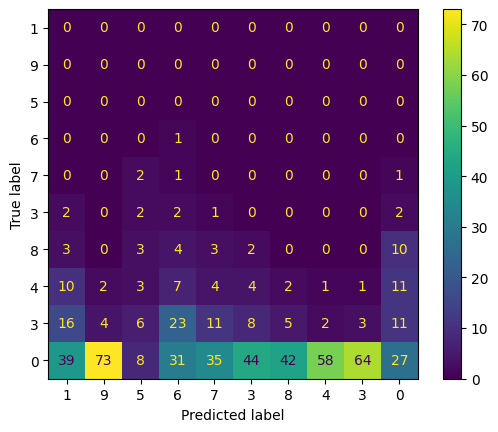

In [242]:
mapped_labels, c_matrix_, sorted_labels = map_cluster_labels_to_true_labels(y_predicted, y_test)
accuracy = accuracy_score(y_test, mapped_labels)
print(f"Accuracy: {accuracy}")

ConfusionMatrixDisplay(c_matrix_, display_labels=sorted_labels).plot()

## K-Means Clustering with Breast Cancer Dataset

In this exercise, you will perform K-Means clustering on the Breast Cancer dataset to identify distinct clusters of samples based on their features.

### Dataset Preparation
- Load the Breast Cancer dataset using scikit-learn's `load_breast_cancer` function.
- Split the dataset into training and testing sets using `train_test_split`.
- Data Labels
  1. **mean radius**: Mean of distances from center to points on the perimeter of the tumor.
  2. **mean texture**: Standard deviation of gray-scale values.
  3. **mean perimeter**: Mean size of the core tumor.
  4. **mean area**: Mean area of the tumor.
  5. **mean smoothness**: Mean of local variation in radius lengths.
  6. **mean compactness**: Mean of perimeter^2 / area - 1.0.
  7. **mean concavity**: Mean of severity of concave portions of the contour.
  8. **mean concave points**: Mean for number of concave portions of the contour.
  9. **mean symmetry**: Mean symmetry of tumor.
  10. **mean fractal dimension**: Mean of "coastline approximation" - 1.
  11. **radius error**: Standard error of distances from center to points on the perimeter.
  12. **texture error**: Standard error for standard deviation of gray-scale values.
  13. **perimeter error**: Standard error for size of the core tumor.
  14. **area error**: Standard error for area of the tumor.
  15. **smoothness error**: Standard error for local variation in radius lengths.
  16. **compactness error**: Standard error for perimeter^2 / area - 1.0.
  17. **concavity error**: Standard error for severity of concave portions of the contour.
  18. **concave points error**: Standard error for number of concave portions of the contour.
  19. **symmetry error**: Standard error for symmetry of tumor.
  20. **fractal dimension error**: Standard error for "coastline approximation" - 1.
  21. **worst radius**: "Worst" or largest mean value for mean of distances from center to points on the perimeter.
  22. **worst texture**: "Worst" or largest mean value for standard deviation of gray-scale values.
  23. **worst perimeter**: "Worst" or largest mean value for size of the core tumor.
  24. **worst area**: "Worst" or largest mean value for area of the tumor.
  25. **worst smoothness**: "Worst" or largest mean value for local variation in radius lengths.
  26. **worst compactness**: "Worst" or largest mean value for perimeter^2 / area - 1.0.
  27. **worst concavity**: "Worst" or largest mean value for severity of concave portions of the contour.
  28. **worst concave points**: "Worst" or largest mean value for number of concave portions of the contour.
  29. **worst symmetry**: "Worst" or largest mean value for symmetry of tumor.
  30. **worst fractal dimension**: "Worst" or largest mean value for "coastline approximation" - 1.

### K-Means Clustering
- Implement K-Means clustering with 2 clusters on the training data.
- Use the trained model to predict cluster labels for the test data.

### Visualization
- Visualize the clusters in a 3D scatter plot.
- Each data point is colored based on its predicted cluster label.

### Evaluation
- Evaluate the clustering accuracy using the predicted cluster labels and the true labels from the test data.
- Print the accuracy score to the console.



In [243]:
colors = np.array(["red", "green"])

bc = datasets.load_breast_cancer()

x = bc.data  # Feature matrix
y = bc.target  # Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=122)

# pca = PCA(n_components=2)
# x_pca = pca.fit_transform(x)
# x_train, x_test, x_pca_train, x_pca_test, y_train, y_test = train_test_split(x, x_pca, y, test_size=.33, random_state=122)

model = KMeans(n_clusters=2)
model.fit(x_train)

centroids = model.cluster_centers_



y_predicted = model.predict(x_test)

scatter = go.Scatter3d(
    x=x_test[:, 0],
    y=x_test[:, 1],
    z=x_test[:, 3],
    mode='markers',
    marker=dict(
        size=4,
        color=colors[y_predicted],
        opacity=0.8
    ),
    name="data"
)

centroid_scatter = go.Scatter3d(
    x=centroids[:, 0],
    y=centroids[:, 1],
    z=centroids[:, 3],
    mode='markers',
    marker=dict(
        size=9,
        color='blue',
        opacity=1,
        symbol="diamond"
    ),
    name='Centroid'
)

layout = go.Layout(
    title='K-Means Clustering on Digits Dataset',
    scene=dict(
        xaxis=dict(title='PC 1'),
        yaxis=dict(title='PC 2'),
        zaxis=dict(title='PC 3')
    )
)

mapped_labels, c_matrix_, sorted_labels = map_cluster_labels_to_true_labels(y_predicted, y_test)
accuracy = accuracy_score(y_test, mapped_labels)
print(f"Accuracy: {accuracy}")

fig = go.Figure(data=[scatter, centroid_scatter], layout=layout)
fig.show()



Accuracy: 0.8617021276595744
